In [20]:
import cugraph
import cudf
import pandas as pd
import numpy as np
import math
from graph_tool.all import *

# Mechanism
It's a 4 points bezier curve.
The first two numbers are the x and y of first point (this should stay 0, 0 to mean the origin of the edge).
The last 2 numbers are the x and y of the last point (this should

(0, 3)
(1, 2)
(1, 3)
(2, 0)


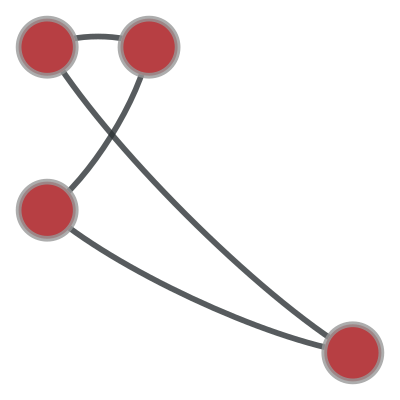

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe0f75c6e50, at 0x7fe0f7e5e280>

In [27]:
g = Graph()
g.add_vertex(4)
pos = g.new_vertex_property('vector<float>')
pos[g.vertex(0)] = [0, 0]
pos[g.vertex(1)] = [0, 8]
pos[g.vertex(2)] = [5, 0]
pos[g.vertex(3)] = [15, 15]
g.add_edge(g.vertex(0), g.vertex(3))
g.add_edge(g.vertex(1), g.vertex(2))
g.add_edge(g.vertex(1), g.vertex(3))
g.add_edge(g.vertex(2), g.vertex(0))

g.vertex_properties['pos'] = pos
ctl = g.new_edge_property('vector<float>')
angle = 1 # negative is clockwise
for e in g.edges():
    ctl[e] = [0,0,  0.25,angle,  0.75,angle,  1,0]
    print(e)

Xs = list(pos.get_2d_array([0])[0])
Ys = list(pos.get_2d_array([1])[0])
    
for v in g.vertices():
    for e in v.out_edges():
        s = e.source()
        t = e.target()
        s_pos = (Xs[int(s)], Ys[int(s)])
        t_pos = (Xs[int(t)], Ys[int(t)])
        d = math.dist(s_pos, t_pos)
        ctl[e] = [0,0,  0.25,math.log10(d),  0.75,math.log10(d),  1,0]
    
graph_draw(g, pos=g.vp.pos, edge_control_points=ctl, output_size=[200,200], edge_end_marker="none")

### 